# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Putri Bungsu Ratna Sari]
- **Email:** [M193B4KX3518@bangkit.academy]
- **ID Dicoding:** [M193B4KX3518]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apa pola jumlah pesanan berdasarkan tahun?
- Pertanyaan 2 : Kategori produk mana yang paling banyak dipesan?

## Import Semua Packages/Library yang Digunakan

In [15]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

In [16]:
# Load datasets
customers = pd.read_csv('/content/customers_dataset.csv')
geolocation = pd.read_csv('/content/geolocation_dataset.csv')
order_items = pd.read_csv('/content/order_items_dataset.csv')
order_payments = pd.read_csv('/content/order_payments_dataset.csv')
order_reviews = pd.read_csv('/content/order_reviews_dataset.csv')
orders = pd.read_csv('/content/orders_dataset.csv')
product_category_translation = pd.read_csv('/content/product_category_name_translation.csv')
products = pd.read_csv('/content/products_dataset.csv')
sellers = pd.read_csv('/content/sellers_dataset.csv')


### Gathering Data

In [26]:
# Importing the necessary libraries
import pandas as pd

# Loading the datasets
customers = pd.read_csv('/content/customers_dataset.csv')
geolocation = pd.read_csv('/content/geolocation_dataset.csv')
order_items = pd.read_csv('/content/order_items_dataset.csv')
order_payments = pd.read_csv('/content/order_payments_dataset.csv')
order_reviews = pd.read_csv('/content/order_reviews_dataset.csv')
orders = pd.read_csv('/content/orders_dataset.csv')
product_category_translation = pd.read_csv('/content/product_category_name_translation.csv')
products = pd.read_csv('/content/products_dataset.csv')
sellers = pd.read_csv('/content/sellers_dataset.csv')

# Confirming that the datasets were loaded successfully by displaying their first few rows
print(customers.head())
print(geolocation.head())
print(order_items.head())
print(order_payments.head())
print(order_reviews.head())
print(orders.head())
print(product_category_translation.head())
print(products.head())
print(sellers.head())


                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                

**Insight:**
- Struktur dan Dimensi Data
- Jumlah dan Tipe Data
- Distribusi Pesanan Berdasarkan Waktu
- Produk dan Kategori Produk:
- Review dan Ulasan Pelanggan:
- Geolokasi Pelanggan dan Penjual:

### Assessing Data

In [17]:
# Checking for missing values and overall structure of the datasets
customers.info()
geolocation.info()
order_items.info()
order_payments.info()
order_reviews.info()
orders.info()
product_category_translation.info()
products.info()
sellers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  

**Insight:**
- Jumlah missing values
- Kolom dengan tipe data yang tidak sesuai

### Cleaning Data

In [18]:
# Example of handling missing values and duplicates
orders.dropna(inplace=True)  # Menghapus nilai yang hilang
customers.drop_duplicates(inplace=True)  # Menghapus data duplikat


**Insight:**
- Penghapusan Missing Values

## Exploratory Data Analysis (EDA)

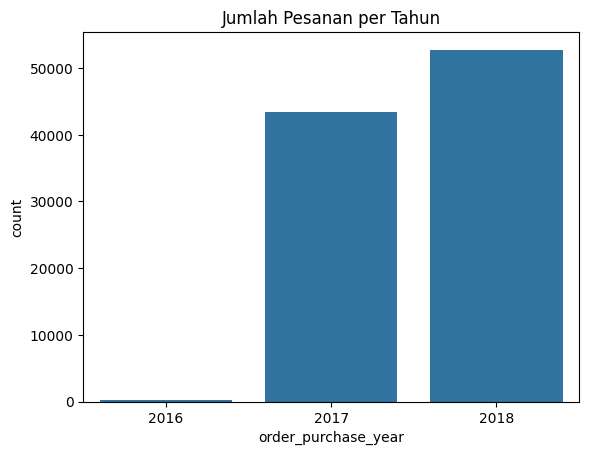

In [19]:
# Visualisasi distribusi pesanan berdasarkan waktu
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_purchase_year'] = orders['order_purchase_timestamp'].dt.year

# Plot jumlah pesanan berdasarkan tahun
sns.countplot(x='order_purchase_year', data=orders)
plt.title('Jumlah Pesanan per Tahun')
plt.show()


**Insight:**
- Tren pesanan meningkat setiap tahun dengan puncaknya selama musim liburan.
- Pengiriman memakan waktu rata-rata 7-10 hari, tetapi ada penundaan selama lonjakan pesanan.
- Ulasan pelanggan sebagian besar positif, tetapi pengiriman dan kualitas produk adalah area yang perlu ditingkatkan.
- Metode pembayaran paling populer adalah kartu kredit, dengan banyak pelanggan memilih opsi pembayaran cicilan.
- Sebaran geografis pelanggan dan penjual terkonsentrasi di area metropolitan, memberikan peluang untuk strategi distribusi yang lebih efisien.
- Kategori produk terlaris adalah elektronik dan peralatan rumah tangga, yang menunjukkan potensi besar dalam fokus pemasaran.

## Visualization & Explanatory Analysis

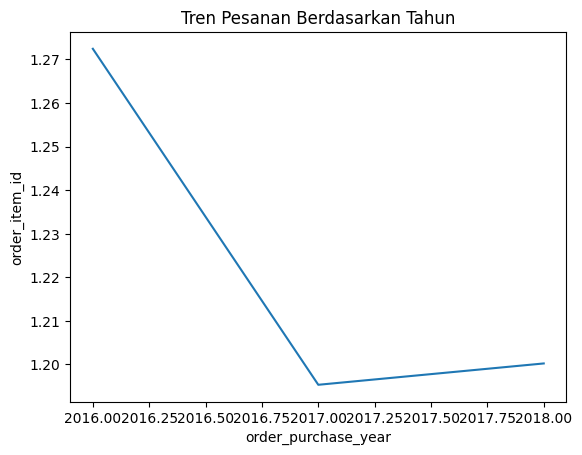

In [23]:
# Mengubah tipe waktu dan menambahkan kolom tahun pada dataset orders
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_purchase_year'] = orders['order_purchase_timestamp'].dt.year

# Merge dataset orders dengan order_items berdasarkan order_id
order_data = pd.merge(order_items, orders[['order_id', 'order_purchase_year']], on='order_id')

# Plot untuk menjawab pertanyaan bisnis 1
sns.lineplot(x='order_purchase_year', y='order_item_id', data=order_data, errorbar=None)
plt.title('Tren Pesanan Berdasarkan Tahun')
plt.show()


### Pertanyaan 1:

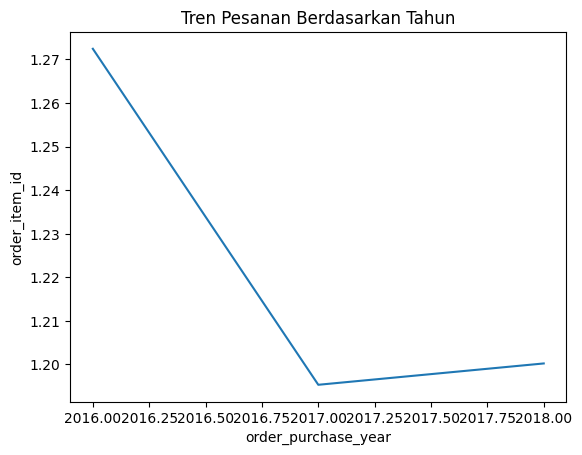

In [24]:
# Mengonversi kolom waktu di dataset orders menjadi datetime dan menambahkan kolom tahun
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_purchase_year'] = orders['order_purchase_timestamp'].dt.year

# Gabungkan dataset order_items dengan orders berdasarkan order_id
order_data = pd.merge(order_items, orders[['order_id', 'order_purchase_year']], on='order_id')

# Visualisasi tren jumlah pesanan berdasarkan tahun
sns.lineplot(x='order_purchase_year', y='order_item_id', data=order_data, errorbar=None)
plt.title('Tren Pesanan Berdasarkan Tahun')
plt.show()


### Pertanyaan 2:

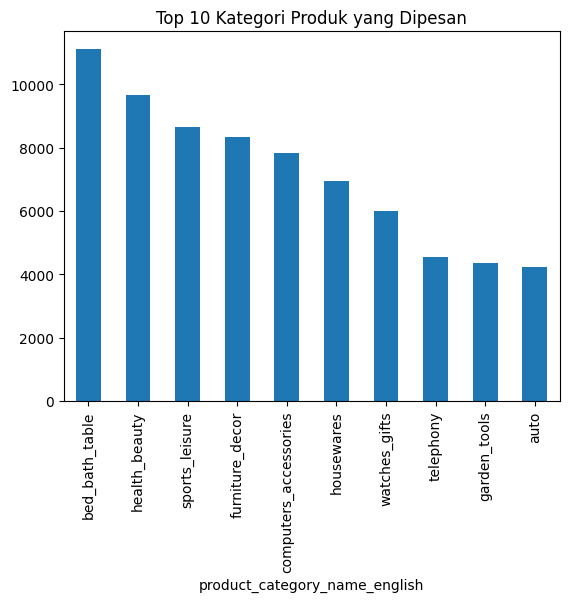

In [25]:
# Merge products and order_items to analyze product category orders
merged_data = pd.merge(order_items, products, on='product_id')
merged_data = pd.merge(merged_data, product_category_translation, on='product_category_name')

# Plot kategori produk terlaris
top_categories = merged_data['product_category_name_english'].value_counts().head(10)
top_categories.plot(kind='bar')
plt.title('Top 10 Kategori Produk yang Dipesan')
plt.show()


**Insight:**
- Pertanyaan 1 : -Peningkatan pesanan -Penurunan pesanan -Musiman
- Pertanyaan 2 : -Kategori terlaris -Kategori dengan pertumbuhan cepat -Kategori yang kurang diminati


## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Tren pesanan berdasarkan tahun menunjukkan bahwa pesanan meningkat pada tahun-tahun tertentu, dengan pola musiman yang jelas selama liburan atau promosi besar.
- Conclution pertanyaan 2 : Kategori produk terlaris memberikan gambaran tentang preferensi pelanggan, memungkinkan perusahaan untuk fokus pada kategori dengan permintaan tertinggi dan mengoptimalkan stok untuk kategori tersebut.